### **Table of Contents**

1. Create dummy values
1. Create list of names from 1
1. Create table using list 1 and 2
1. Calculate total of expenses
1. Plotting (Pie Chart) using matplotlib module

#### 1. Create dummy values

You need pandas and numpy to run this code. One of the simplest way to install them is through <br>
`pip install pandas` depending on your system. Same can be done for numpy.

It is easy creating pandas dataframe object from dictionary object. Hence, I created a dictionary <br> 
first using randomly generated values.

In [30]:
import random 
import pandas as pd
import numpy as np
from datetime import datetime as dt
from random import choice
   
def create_random_data():
    """"
    Create random values for date, amount(cost_in Euros),
    name and categories.
    """
    #this is used to create list conatining dates for 3 months
    np.random.seed(0)
    start_date = dt.strptime("2022-01-01", "%Y-%m-%d")
    end_date = dt.strptime("2022-03-31", "%Y-%m-%d")
    create_date = pd.date_range(start_date, end_date)
    date = create_date.strftime("%Y-%m-%d")
    
    data_list = []
    for element in range(100):
        
        users_list = { "Name": np.random.choice(['Peter James', 'Saba Sartipi', 'Jonny Trump', 'Barack Obama', 
                                       "Mahar Ali", 'James King', 'Gabriel Udoh', "Muhamed Ali"]),
                      "Cost_in_Euros": np.round(np.random.uniform(0.55, 350.24), 2),
                      "Date": np.random.choice(date),
                      "Category": np.random.choice(["Entertainment", "Grocery", "Charity", "Property tax",
                                          "Clothing", "Cosmetic", "Transportation", "Health"])
                    }
        
        data_list.append(users_list)
    
    return data_list
#create_random_data()

In [ ]:
while True:
    cost_in_Euros = input("Enter the amount spent in Euros: ")
    if cost_in_Euros.isnumeric():
        cost_in_Euros = float(cost_in_Euros)
    try:
        cost_in_Euros = float(cost_in_Euros)
    except ValueError:
        print("\nInvalid entry, amount must be number: ")
        continue
    break

In [20]:

while True:
    a = input("Enter number: ")
    if isinstance(a, int):
        a = int(a)
    else:
        print("incorrect")
        continue
    print(a)
    break
#print(a)

incorrect


KeyboardInterrupt: Interrupted by user

In [39]:
#  while True:
#     cost_in_Euros = input("Enter the amount spent in Euros: ")
#     if cost_in_Euros.isnumeric():
#         cost_in_Euros = float(cost_in_Euros)
#     else:
#         print("\nInvalid entry, amount must be number: ")
#         continue
#     print(cost_in_Euros)
#     break
"10".isnumeric()

True

In [35]:
type("10")

str

#### Create list of names (example)
This is just for demonstration purposes. If you create pandas dataframe object using dictionary, it will look like this:

In [31]:
any_dict = [{'Date': '2022-04-27', 'Amount': 95.01, 'Category': 'Entertainment', 'Name': "Saba"},
            {'Date': '2022-04-28', 'Amount': 50.09, 'Category': 'cosmetic', 'Name': "Mahar"},
            {'Date': '2022-04-29', 'Amount': 150.15, 'Category': 'grocery', 'Name': "Gabriel"}]

pandas_any_dict = pd.DataFrame(any_dict)
pandas_any_dict

Date  Amount       Category     Name
0  2022-04-27   95.01  Entertainment     Saba
1  2022-04-28   50.09       cosmetic    Mahar
2  2022-04-29  150.15        grocery  Gabriel

Now, I want to swap the 0, 1 and 2 with Saba, Mahar, Gabriel. To do that I extracted the names<br>
using list compresion and the result will look like: 
```python
list_of_name = ["Saba", "Mahar", "Gabriel"]
```
The function below helps me to achieve this for create_random_data() function above.

Comapare this table to the previous one, you noticed that the numbers have swapped and the last column is missing.

In [32]:
any_dict = [{'Date': '2022-04-27', 'Cost_in_Euros': 95.01, 'Category': 'Entertainment', 'Name': "Saba"},
            {'Date': '2022-04-28', 'Cost_in_Euros': 50.09, 'Category': 'cosmetic', 'Name': "Mahar"},
            {'Date': '2022-04-29', 'Cost_in_Euros': 150.15, 'Category': 'grocery', 'Name': "Gabriel"}]

list_of_name = ["Saba", "Mahar", "Gabriel"]

#creating the table
pandas_any_dict = pd.DataFrame(any_dict, list_of_name, columns=["Date", "Cost_in_Euros", "Category"])
pandas_any_dict

Date  Cost_in_Euros       Category
Saba     2022-04-27          95.01  Entertainment
Mahar    2022-04-28          50.09       cosmetic
Gabriel  2022-04-29         150.15        grocery

I just noticed I can also do this by using the set_index("index_name_of_your_choice")<br>
that is pd.DataFrame().set_index("index_name_of_your_choice).

In [33]:
any_dict = [{'Date': '2022-04-27', 'Amount': 95.01, 'Category': 'Entertainment', 'Name': "Saba"},
            {'Date': '2022-04-28', 'Amount': 50.09, 'Category': 'cosmetic', 'Name': "Mahar"},
            {'Date': '2022-04-29', 'Amount': 150.15, 'Category': 'grocery', 'Name': "Gabriel"}]

pandas_any_dict = pd.DataFrame(any_dict).set_index("Name")
pandas_any_dict

Date  Amount       Category
Name                                      
Saba     2022-04-27   95.01  Entertainment
Mahar    2022-04-28   50.09       cosmetic
Gabriel  2022-04-29  150.15        grocery

#### 2. Create list of names from 1

If you understood the above example with just three entries in the dictionary you should have no problem with understanding this section. <br>I created random variables for date, cost_in_euros, name(user) and category. I think we don't need decription of items because I think its <br>similar to categories.

In [34]:
def create_table_names(input_file = create_random_data()):
    """Extract list of names from create_random_data()"""
    
    #this is list comprehension
    table_list = [element[key] 
                    for element in input_file
                    for key in element.keys() 
                    if key == "Name"]
    
    return table_list

#### 3. Create table using list 1 and 2

The pandas.DataFrame has an optional index parameter which can be used for the swapping. And <br> lastly I dropped the column containing names by specify only Date, Amount and Category  using <br>the columns option.

In [35]:
def create_pandas_table():
    """Final tables with sorted date in descending order"""
    data = pd.DataFrame(create_random_data(), index=create_table_names(),
                          columns=["Date", "Cost_in_Euros", "Category"])
    sort_data = data.sort_values(by="Date", ascending=True)
    
    return sort_data

Similarly another way of doing this instead of creating the function create table names is:

In [36]:
rearrange_data = pd.DataFrame(create_random_data(), columns=["Name", "Date", 
                            "Cost_in_Euros", "Category"]).set_index("Name")
            
sort_rearranage_data = rearrange_data.sort_values(by="Date", ascending=True)
sort_rearranage_data

Date  Cost_in_Euros        Category
Name                                                   
Muhamed Ali   2022-01-02         104.86          Health
James King    2022-01-03           2.19    Property tax
Muhamed Ali   2022-01-03         104.11         Grocery
Mahar Ali     2022-01-03         304.13    Property tax
James King    2022-01-05         156.91    Property tax
...                  ...            ...             ...
Jonny Trump   2022-03-25         341.99         Grocery
James King    2022-03-28          41.18        Cosmetic
Barack Obama  2022-03-29         109.60        Cosmetic
Peter James   2022-03-29         226.37   Entertainment
James King    2022-03-29         134.96  Transportation

[100 rows x 3 columns]

For writing and reading

In [37]:
#write and read to file
def write_and_read(file_name, data):
    """to read and write"""
    with open(file_name, 'w') as file:
        file.write(data.to_string()) 
    
    with open(file_name, 'r') as f:
        print(f.read())

#This is how the tale looks like for 100 iterations
#call the write and read function
write_and_read("any_file_name.txt", create_pandas_table())

                    Date  Cost_in_Euros        Category
Muhamed Ali   2022-01-02         104.86          Health
James King    2022-01-03           2.19    Property tax
Muhamed Ali   2022-01-03         104.11         Grocery
Mahar Ali     2022-01-03         304.13    Property tax
James King    2022-01-05         156.91    Property tax
Peter James   2022-01-06         255.98   Entertainment
Peter James   2022-01-08         291.86   Entertainment
Barack Obama  2022-01-10         191.09    Property tax
Barack Obama  2022-01-11         341.68    Property tax
Barack Obama  2022-01-12         228.95  Transportation
Muhamed Ali   2022-01-12         157.19   Entertainment
Gabriel Udoh  2022-01-14         257.64   Entertainment
Jonny Trump   2022-01-15          45.63    Property tax
James King    2022-01-15         273.49          Health
Mahar Ali     2022-01-16          89.12        Clothing
James King    2022-01-18         214.59          Health
Saba Sartipi  2022-01-18         337.82        C

#### 4. Calculate total of expenses (1) <br>
1. First we need to extract data according to category into a dictionary, I used part of our previuos <br>codes in preject.

In [39]:
def create_category_data():
    """
    Create a dictionary containing only categories of expenses
    as key and their respective amount as values.
    """
    list_of_entries2 = create_random_data()
    new_category = []

    for index_value in list_of_entries2:
        new_category.append(index_value['Category'])

    category_data = {}
    for name in new_category:
        temp_data = []
        for element in list_of_entries2:
            if element['Category'] == name:
                temp_data.append(element['Cost_in_Euros'])
        category_data[name] = temp_data

    return category_data

#create_category_data() e.g -->  {'cosmetic': [50.09, 15.0], 'fun': [95.01, 25.45], 'grocery': [150.15]}
for key, value in create_category_data().items():
    print(f"{key}: {value}\n")

Property tax: [207.86, 191.09, 227.21, 166.17, 183.04, 45.63, 2.19, 156.91, 231.23, 228.97, 304.13, 58.89, 282.86, 341.68, 238.53, 265.75, 97.63, 46.73]

Transportation: [134.96, 228.95, 332.61, 101.75, 262.53, 314.06, 162.61, 232.42]

Grocery: [337.53, 316.09, 104.11, 321.12, 12.17, 213.25, 341.99, 9.18, 205.61]

Entertainment: [284.56, 324.22, 272.66, 325.52, 295.11, 193.87, 257.64, 139.2, 110.08, 231.41, 157.19, 60.57, 119.09, 250.47, 226.37, 65.47, 75.91, 255.98, 32.93, 291.86]

Health: [273.49, 204.08, 214.59, 238.98, 346.17, 212.06, 104.86, 347.58, 199.72, 152.46, 181.76, 6.3]

Clothing: [271.29, 114.22, 222.62, 89.12, 223.97, 159.15, 58.14, 167.91, 308.38, 256.42, 102.71]

Cosmetic: [47.83, 218.59, 230.06, 342.01, 41.18, 138.63, 312.45, 250.31, 268.03, 187.86, 337.82, 73.93, 109.6, 162.51, 253.05]

Charity: [218.35, 155.01, 308.44, 198.68, 264.95, 261.8, 51.2]



#### Calculate total expenses (2) <br>
2. Using function from Calculate total expenses (1) the total expenses for each category was estimated.

In [40]:
def sum_category_expenses():
    """
    sum amount of each category expenses
    """
    category_expense = create_category_data()
    sum_dictionary = {}
    for key in category_expense.keys():
        sum_dictionary[key] = round(sum(category_expense[key]), 2)

    return sum_dictionary

# sum_category_expenses()  -->  {'cosmetic': 65.09, 'fun': 120.46, 'grocery': 150.15}
for key, value in sum_category_expenses().items():
    print(f"{key}: €{value:,}")

Property tax: €3,276.5
Transportation: €1,769.89
Grocery: €1,861.05
Entertainment: €3,970.11
Health: €2,482.05
Clothing: €1,973.93
Cosmetic: €2,973.86
Charity: €1,458.43


#### Just printing to verify data.

In [41]:
#key and value
print([(key, value) for key, value in sum_category_expenses().items()])
print()
#only key
print([key for key in sum_category_expenses().keys()])
print()
#only value
print([value for value in sum_category_expenses().values()])

[('Property tax', 3276.5), ('Transportation', 1769.89), ('Grocery', 1861.05), ('Entertainment', 3970.11), ('Health', 2482.05), ('Clothing', 1973.93), ('Cosmetic', 2973.86), ('Charity', 1458.43)]

['Property tax', 'Transportation', 'Grocery', 'Entertainment', 'Health', 'Clothing', 'Cosmetic', 'Charity']

[3276.5, 1769.89, 1861.05, 3970.11, 2482.05, 1973.93, 2973.86, 1458.43]


#### 5. Plotting (Pie Chart) using matplotlib module

Just like pandas and matplotlib you can easily install this module if you don't have it on your system.

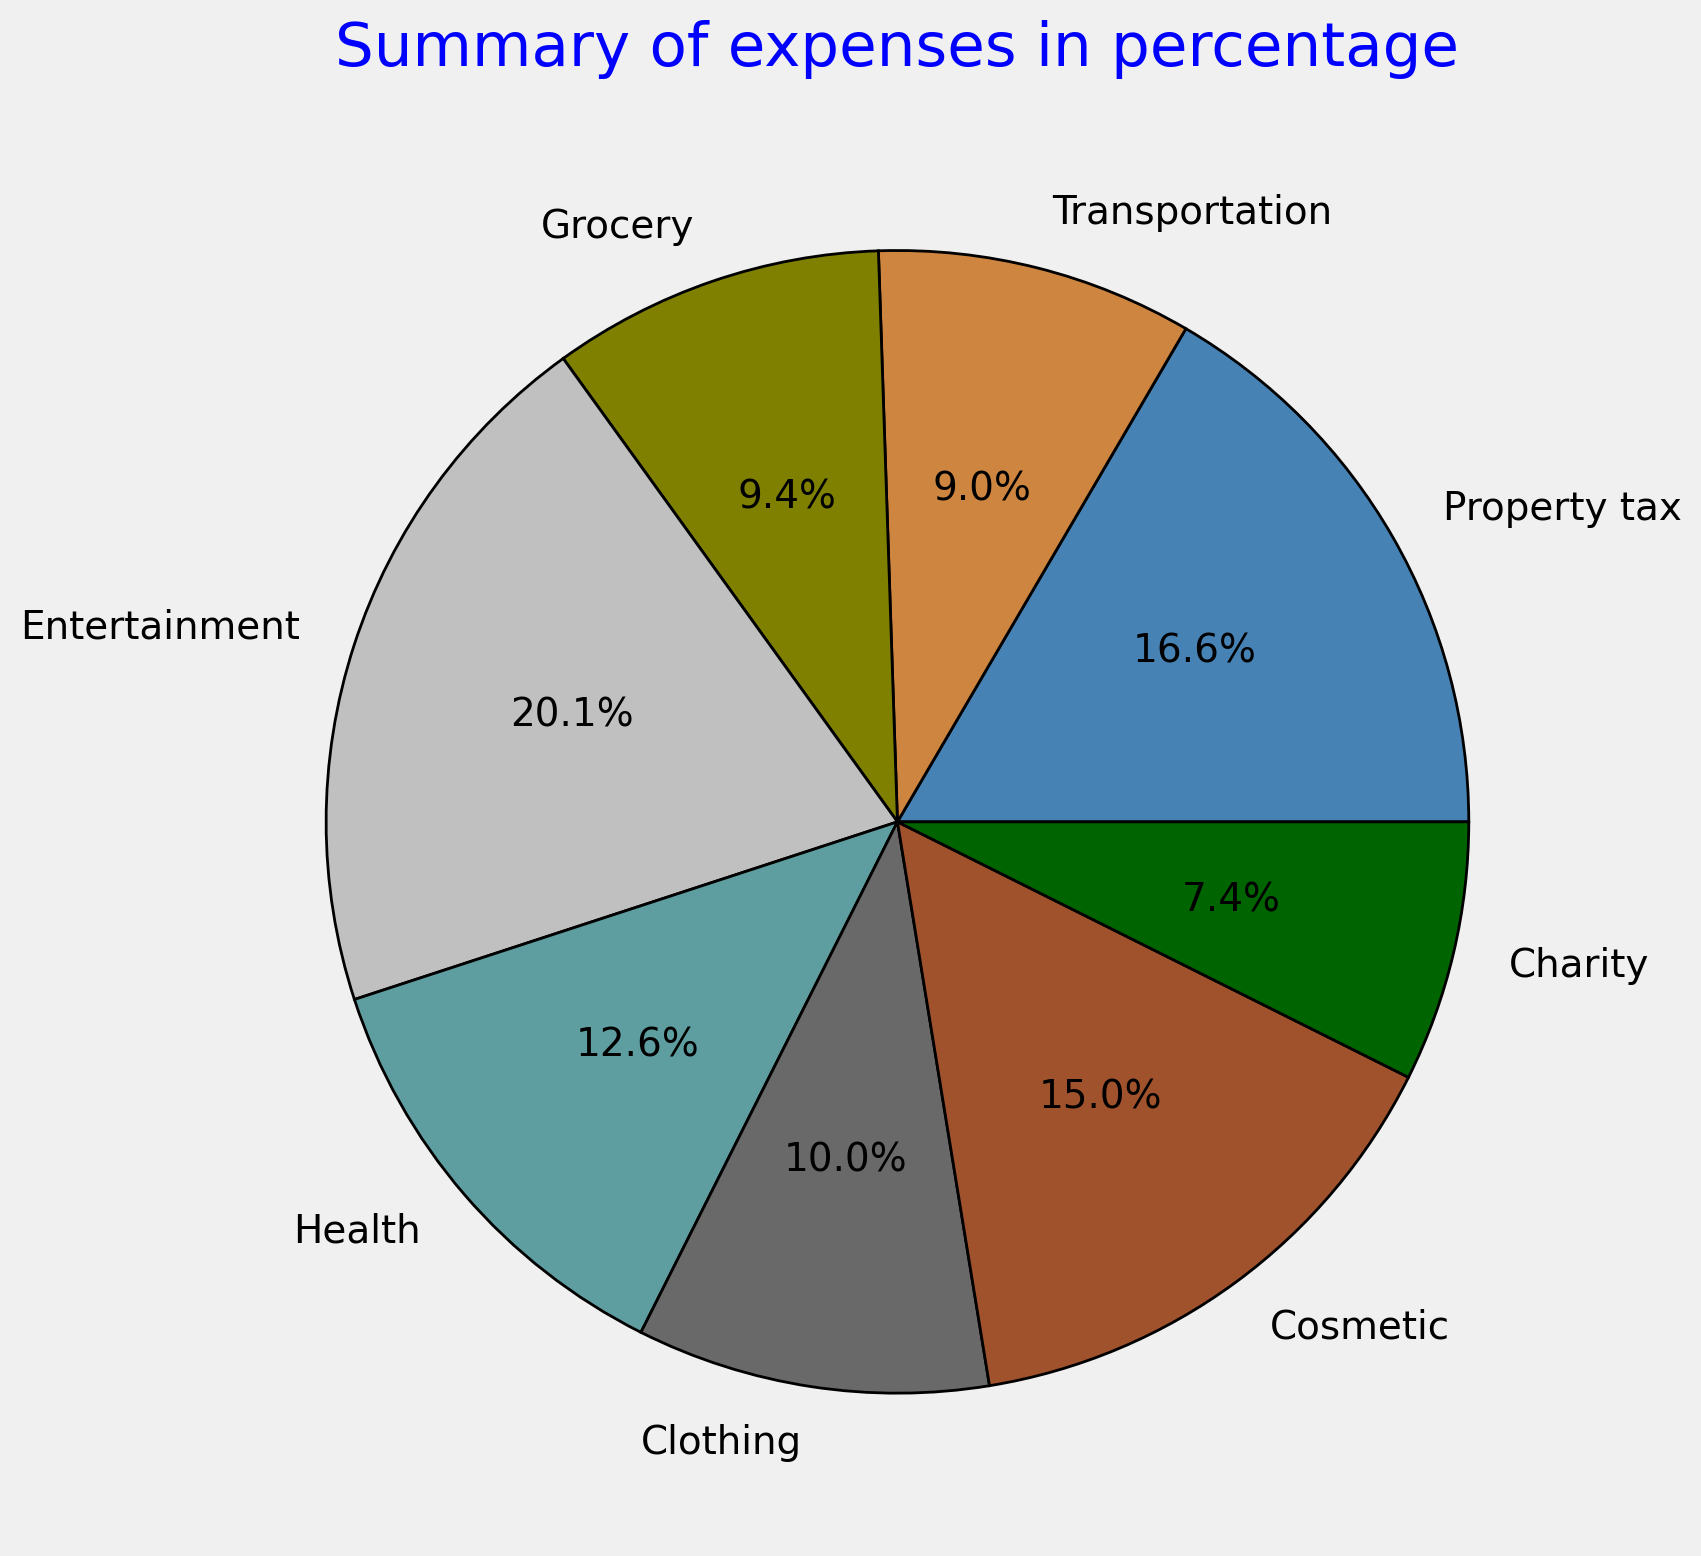

<Figure size 432x288 with 0 Axes>

In [42]:
from matplotlib import pyplot as plt

# To give the plot nice look
plt.style.use("fivethirtyeight")
# Create a figure object, dpi meanss dots per inch.
# I think higher dpi gives better resolution 
fig = plt.figure(figsize=(10,8), dpi=200)

#Create values for plotting using the functions above
category =[key for key in sum_category_expenses().keys()]
values =[value for value in sum_category_expenses().values()]

# Select any color of your choice
colors = ["steelblue", "peru", "olive", "silver", "cadetblue", 
         "dimgray", "sienna", "darkgreen"]

# Plotting begins here by calling plt.pie() and passing in arguements of your choice.
# For detailed understanding of the arguements or paramters kindly look into the 
# matplotlib documentation.
plt.pie(values, labels=category, autopct='%.1f%%', colors=colors,
        wedgeprops={'linewidth': 1.0, 'edgecolor': 'black'})


# Set plot title
plt.title("Summary of expenses in percentage", fontsize=22, pad=15, color="blue")
plt.tight_layout()
# Show plot
plt.show()
# Save plots to your device
plt.savefig("picture.jpg", dpi=300)

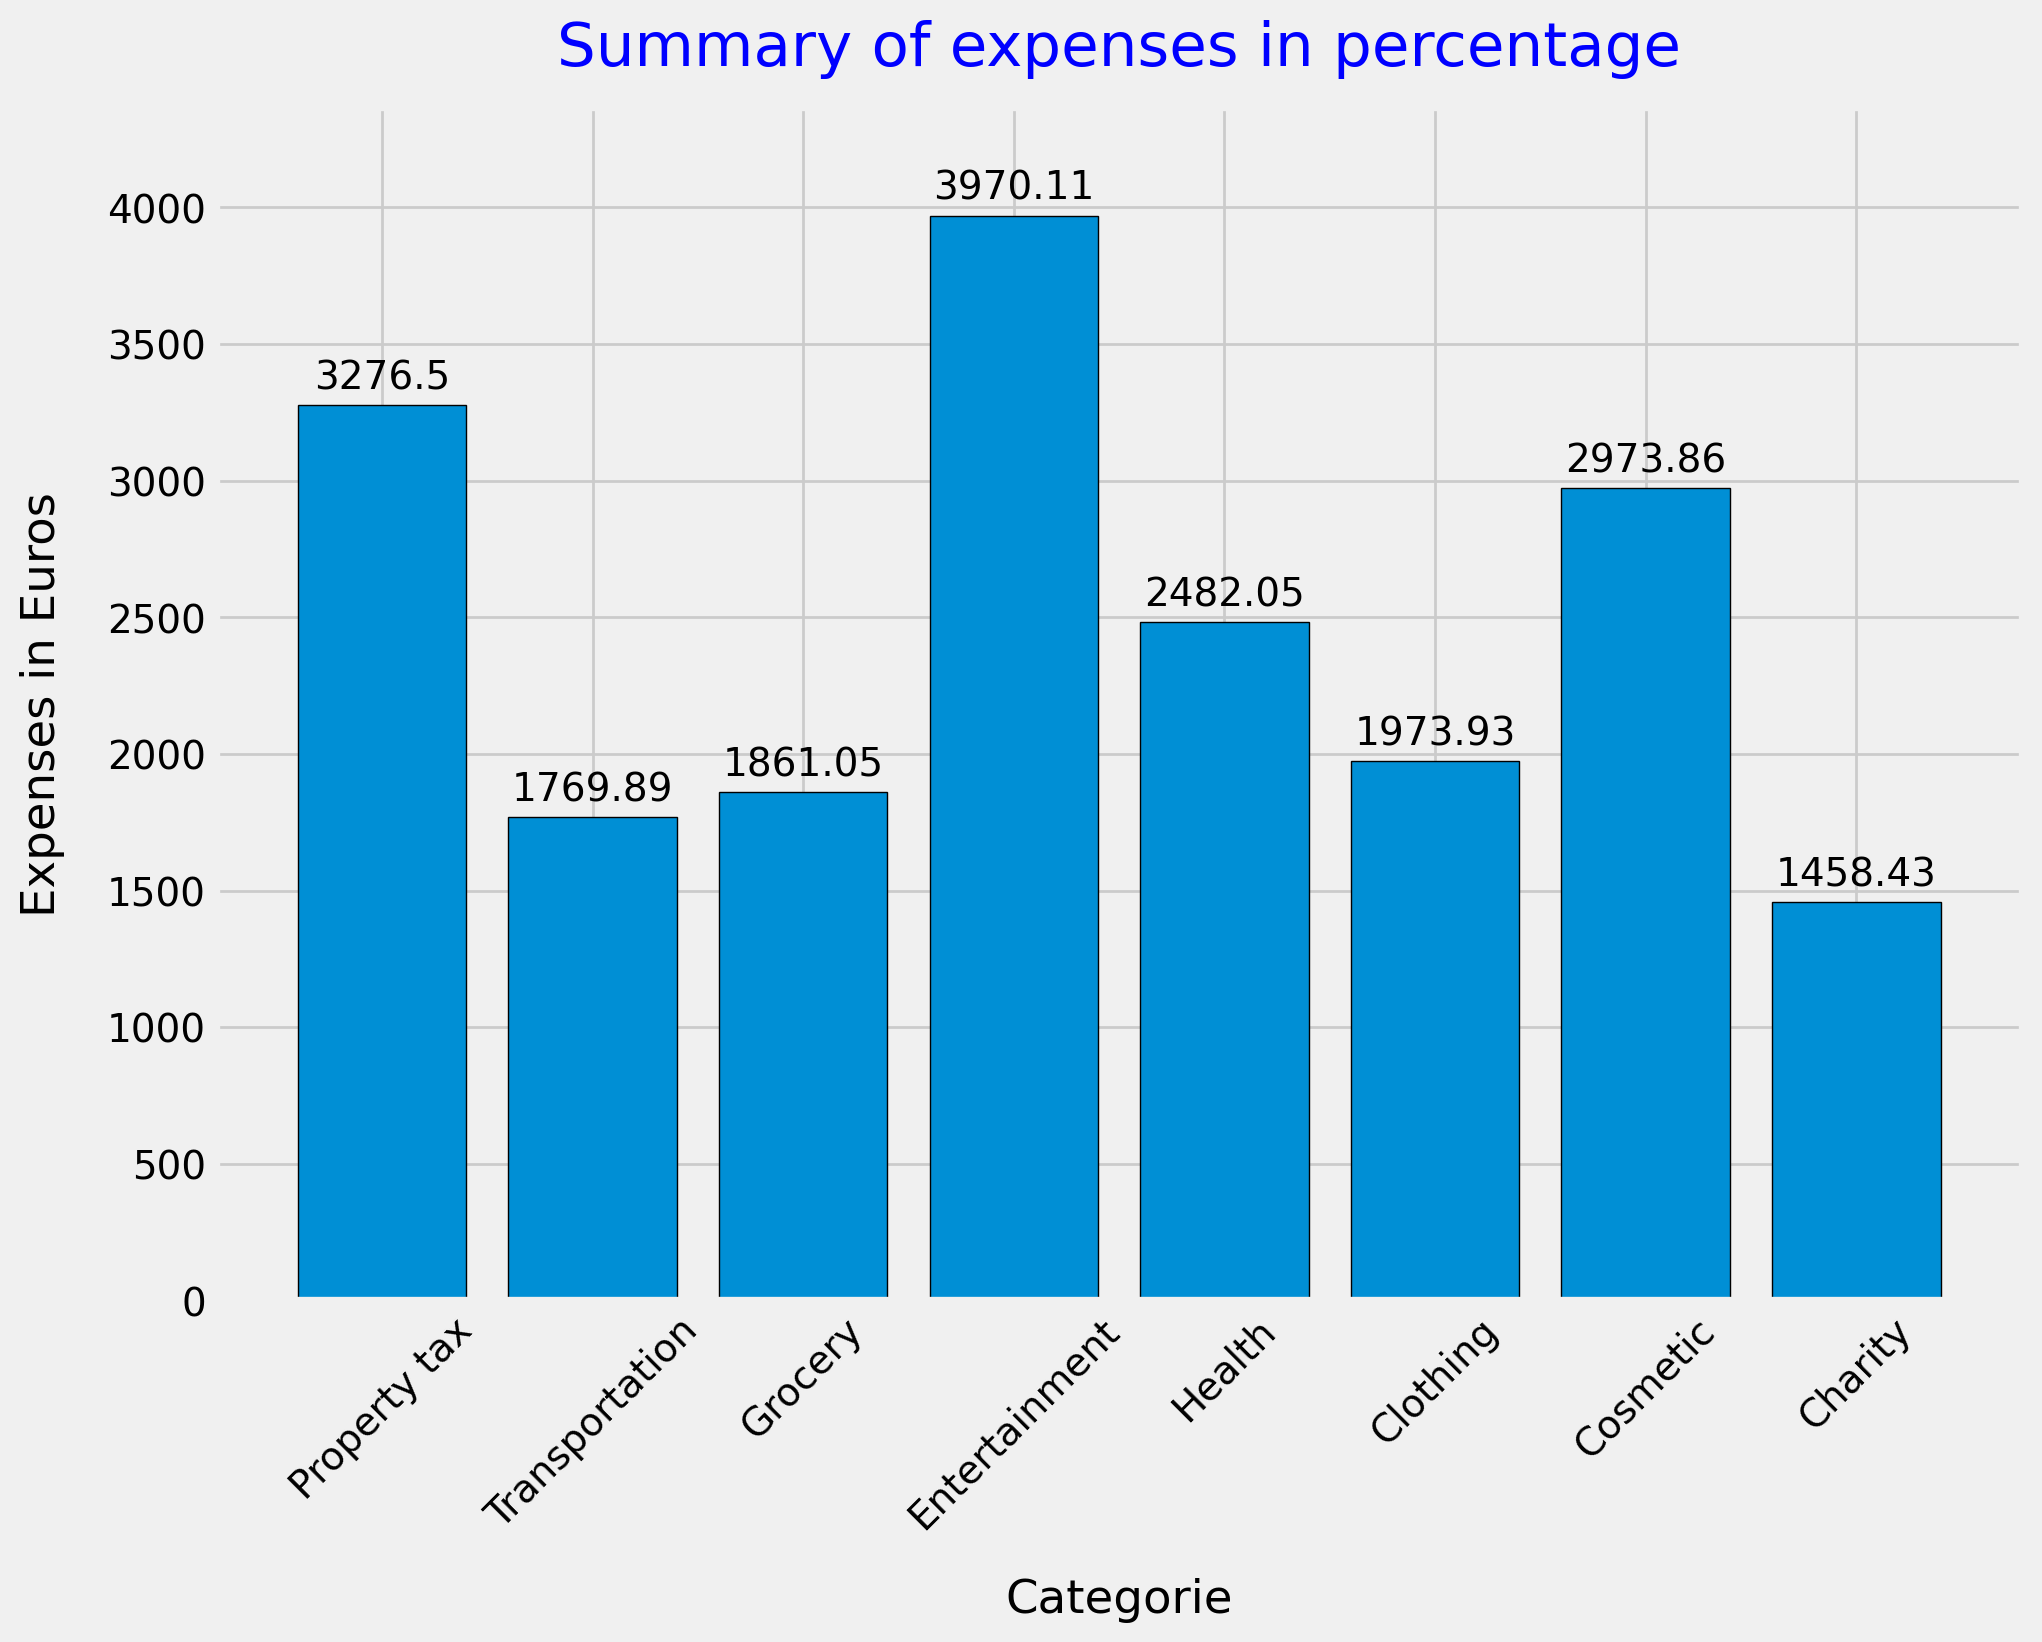

<Figure size 432x288 with 0 Axes>

In [64]:
from matplotlib import pyplot as plt

# To give the plot nice look
plt.style.use("fivethirtyeight")
# Create a figure object, dpi meanss dots per inch.
# I think higher dpi gives better resolution 
fig, ax = plt.subplots(figsize=(10,8), dpi=200)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

#Create values for plotting using the functions above
category =[key for key in sum_category_expenses().keys()]
values =[value for value in sum_category_expenses().values()]

# Select any color of your choice
colors = ["steelblue", "peru", "olive", "silver", "cadetblue", 
         "dimgray", "sienna", "darkgreen"]

# Plotting begins here by calling plt.pie() and passing in arguements of your choice.
# For detailed understanding of the arguements or paramters kindly look into the 
# matplotlib documentation.
a=plt.bar(category, values, ec="black")
# for i in range(len(category)):
#     plt.text(i, values[i], values[i], ha="center", va="bottom")
# Set plot title
plt.title("Summary of expenses in percentage", fontsize=22, pad=15, color="blue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel("Categorie", labelpad=15)
plt.ylabel("Expenses in Euros", labelpad=15 )
plt.margins(y=0.1)
ax.bar_label(a, padding=3)

#plt.gca().invert_xaxis()
# Show plot
plt.show()
# Save plots to your device
plt.savefig("picture.jpg", dpi=300)

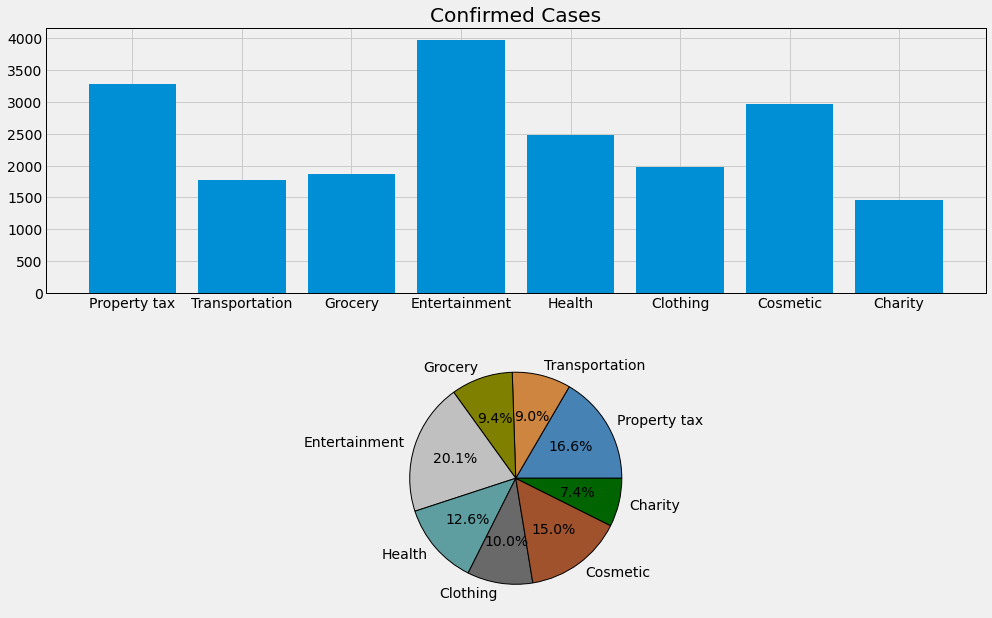

In [ ]:
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
fig, axes = plt.subplots(figsize=(8,6))#, gridspec_kw={'width_ratios': [1, 2]})
# fig.suptitle('Near Surface Temperature (tas) [°C]', fontsize=25)
# fig.supxlabel('Time (days)', fontsize=25)
# plt.subplots_adjust(wspace=0.0)
x1 = np.arange(0,5)
y1 = x1 * 2
x2 = np.arange(1,10)
y2 = np.arange(11,20)
category =[key for key in sum_category_expenses().keys()]
values =[value for value in sum_category_expenses().values()]
wth = 0.8
label = list(map(str, set(range(9))))
# axes[0].grid(color='k', linestyle='--', linewidth=0.5)
# axes[1].grid(color='k', linestyle='--')
axes[0].set(title='Confirmed Cases')
axes[0].bar(category, values)

#axes[1].set(title='Confirmed Cases2')
axes[1].pie(values, labels=category, autopct='%.1f%%', colors=colors,
        wedgeprops={'linewidth': 1.0, 'edgecolor': 'black'})

plt.show()

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import numpy as np

expense_data = 46000
party_bgt = 0.15 * expense_data;     grocery_bgt = 0.3 * expense_data
charity_bgt = 0.05 * expense_data;    clothing_bgt = 0.1 * expense_data
cosmetic_bgt = 0.1 * expense_data;   transport_bgt = 0.1 * expense_data
insurance_bgt = 0.1 * expense_data;  misc_bgt = 0.1 * expense_data

a = tuple("party", "grocery", "charity", "misc", "clothing", "cosmetic", "transport", "insurance")
b = tuple()
c = tuple(np.array([0.15, 0.05, 0.1, 0.1, 0.3, 0.1, 0.1, 0.1]) * expense_data)
c

(6900.0, 2300.0, 4600.0, 4600.0, 13800.0, 4600.0, 4600.0, 4600.0)